In [32]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()      

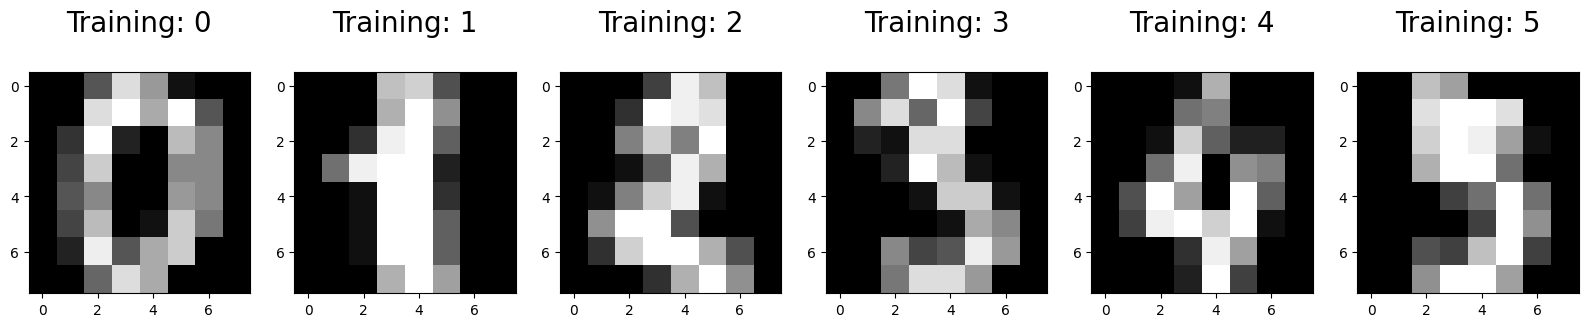

In [33]:
# digits 데이터 이미지 보기
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,60))
for index, (image, label) in enumerate(zip(digits.data[0:6], digits.target[0:6])):
    plt.subplot(1, 6, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    test_size=0.25, random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

d:\tensorflow\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# 부분 테스트 진행
# (모델변수).predict(X_test(예측하고자 하는 변수데이터))
logisticRegr.predict(X_test[0].reshape(1,-1))
logisticRegr.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [37]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9511111111111111


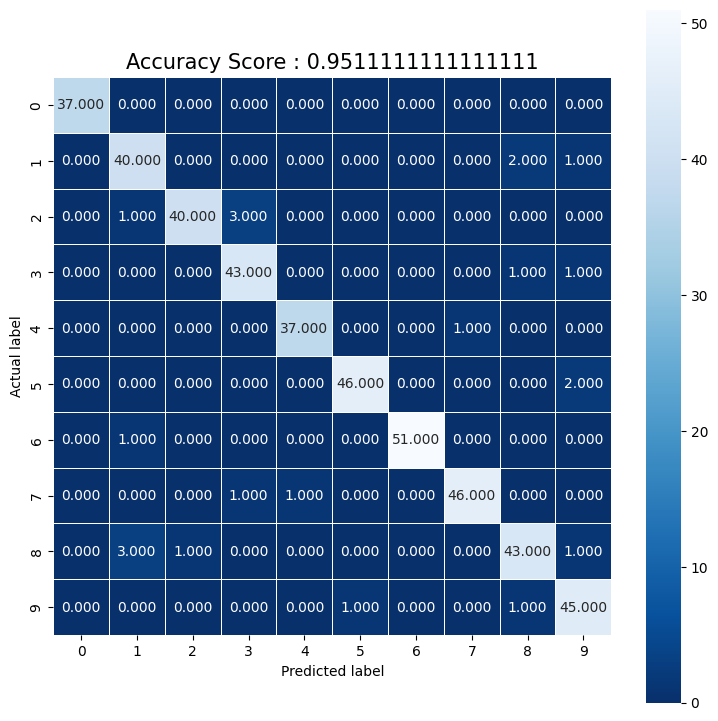

In [16]:
# 혼동행렬을 표시하기(seaborn 을 이용한 hitmap)
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score : {score}'
plt.title(all_sample_title, size=15)

plt.show()

In [2]:
### K-평균 군집화

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
nominal_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for column in nominal_features:
    dummies = pd.get_dummies(data[column], prefix=column) 
    data = pd.concat([data, dummies], axis=1)
    data.drop(column, axis=1, inplace=True)        
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [8]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

data_transformed[0:5]

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861, 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.11825445, 0.01553586, 0.04546385, 0.10484189, 0.01234568,
        0.03723404, 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.20162642, 0.07291369, 0.07755155, 0.063934  , 0.04345483,
        0.10809345, 0.        , 1.        , 0.        , 0.        ,
        1.        ]])

d:\tensorflow\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


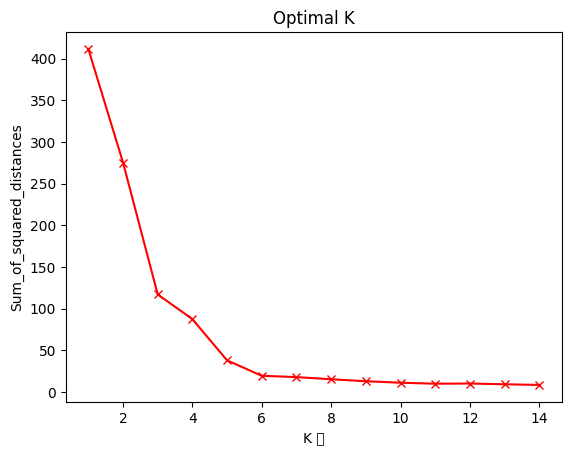

In [46]:
# 원하는 적당한 k값 구하기
Sum_of_squared_distances = []  # SSD(거리 제곱의 합)
K = range(1, 15)               # k값의 범위
for k in K:
    km = KMeans(n_clusters=k) # 1~ 15까지 K값 적용
    km = km.fit(data_transformed) # 데이터 학습
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'rx-') # 그래프 생성
plt.xlabel('K 값')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal K')
plt.show()